✅ Dataset loaded successfully!

🔹 Performing 5-Fold Cross Validation using XGBoost...

Fold 1:
 Accuracy: 0.835, Precision: 0.818, Recall: 0.812, F1: 0.815
 Confusion Matrix:
[[335   2   8  23   9   1   0  15   1  15]
 [  0 640   0   1  46  34  17  15  72   0]
 [ 13   1  75  10   0   0   0   4   0   8]
 [ 12   5  10 786   7   0   0  26   2   7]
 [  4  32   3   4 587  12   7   3  23   2]
 [  0  47   0   0  19 457  56   2  27   0]
 [  0  15   0   0  11  41 556   1  21   0]
 [ 23   8   1  24  10   0   1 495   3  13]
 [  3  44   0   1  13  29  22   1 658   0]
 [ 11   0   5  11   4   0   0  13   0 126]] 



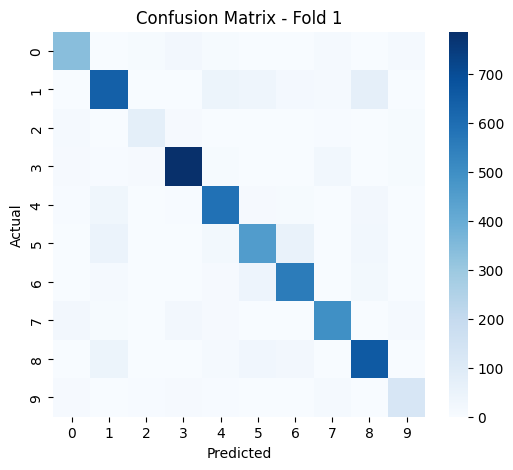

Fold 2:
 Accuracy: 0.838, Precision: 0.826, Recall: 0.834, F1: 0.830
 Confusion Matrix:
[[338   0   6  12   9   1   0  22   1  20]
 [  0 648   1   6  36  51  20   6  56   0]
 [  9   0  89   8   2   0   0   1   0   2]
 [ 21   5  12 782  10   1   0  16   1   8]
 [  8  43   1   9 550  24  10   6  25   1]
 [  0  30   0   2  23 482  41   0  30   0]
 [  0  14   0   0  13  37 556   1  24   0]
 [ 25   9   4  26   2   0   2 497   1  12]
 [  4  47   0   1  14  25  26   4 649   1]
 [  5   1   1   4   4   0   0  12   0 143]] 



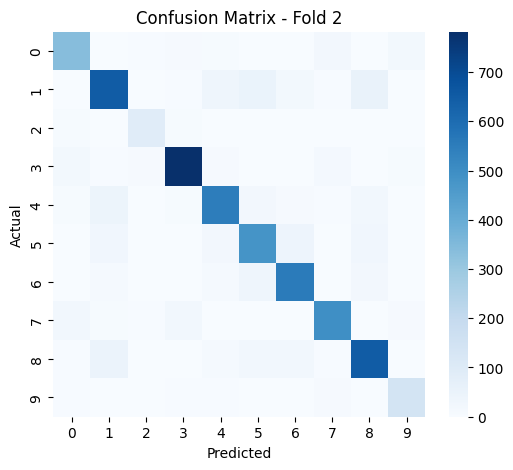

Fold 3:
 Accuracy: 0.834, Precision: 0.818, Recall: 0.816, F1: 0.816
 Confusion Matrix:
[[344   0   7  19   6   2   2  19   2   8]
 [  1 659   1   4  46  39  19   9  46   0]
 [  5   0  83  12   0   0   0   7   0   4]
 [ 12   8  22 776   6   1   0  24   0   6]
 [  3  45   0   8 571  17   9   3  20   2]
 [  1  39   0   1  19 469  46   1  32   0]
 [  0  15   0   0   4  50 553   4  18   0]
 [ 18   8   2  28   3   1   6 499   0  13]
 [  2  52   0   2  22  30  21   0 642   1]
 [  6   0   6  17   5   0   0  16   2 117]] 



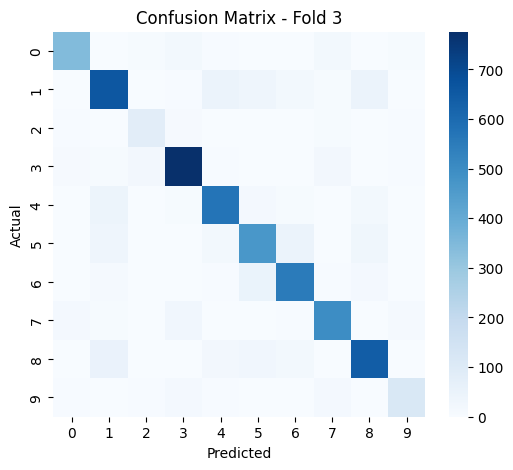

Fold 4:
 Accuracy: 0.846, Precision: 0.834, Recall: 0.831, F1: 0.832
 Confusion Matrix:
[[338   0  12  13  10   0   2  24   1   9]
 [  0 675   0   4  31  52  18   3  41   0]
 [  6   1  88   6   3   0   0   3   0   4]
 [ 15   3   8 785   3   3   0  28   1   9]
 [  8  37   2   6 573  20   6   6  18   2]
 [  2  41   0   0  22 481  41   0  21   0]
 [  0  14   0   0   4  41 549   1  35   0]
 [ 13   9   1  26   1   0   1 514   2  11]
 [  2  49   0   1  25  24  19   3 649   0]
 [ 13   0   1  12   1   0   1  17   0 124]] 



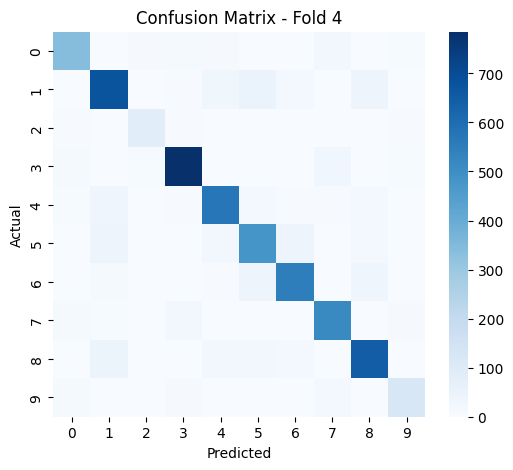

Fold 5:
 Accuracy: 0.842, Precision: 0.832, Recall: 0.826, F1: 0.829
 Confusion Matrix:
[[344   2   9  21   7   1   0  17   2   6]
 [  0 680   0   4  38  42  14   6  40   0]
 [  6   1  84  15   2   0   0   2   0   2]
 [ 15   5   9 788   3   1   0  18   5  11]
 [  6  35   0   4 581   9   9   5  27   2]
 [  0  43   0   2  17 478  40   2  25   0]
 [  1  16   0   0   5  57 539   0  27   0]
 [ 35   8   2  31   2   0   1 485   2  12]
 [  1  40   0   0  18  30  31   1 650   0]
 [ 16   0   3   4   6   0   0  11   1 128]] 



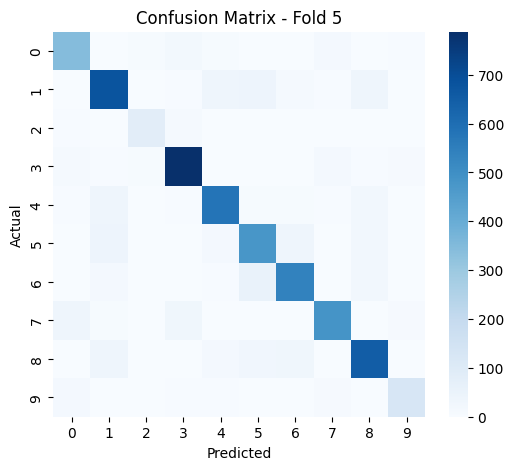

✅ Average Performance Across Folds
Accuracy: 0.839
Precision: 0.826
Recall: 0.824
F1 Score: 0.824


In [23]:
# --- Import required libraries ---
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# --- Load dataset ---
df = pd.read_csv("/content/drive/MyDrive/yield_df.csv")   # change filename if needed
print("✅ Dataset loaded successfully!")

# --- Drop unnecessary columns ---
df = df.drop(['Unnamed: 0', 'Area'], axis=1)

# --- Define features and labels ---
X = df[['Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
        'pesticides_tonnes', 'avg_temp']]
y = df['Item']

# --- Encode target variable (crop type) ---
le = LabelEncoder()
y = le.fit_transform(y)
class_names = le.classes_

# --- Scale features ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Define the model (XGBoost) ---
xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=12,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='mlogloss'   # modern way to specify eval metric
)


# --- Stratified 5-Fold ---
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# --- Store metrics for averaging ---
acc_list, prec_list, rec_list, f1_list = [], [], [], []

print("\n🔹 Performing 5-Fold Cross Validation using XGBoost...\n")

# --- Iterate over folds ---
for fold, (train_idx, test_idx) in enumerate(cv.split(X_scaled, y), 1):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Train the model
    xgb.fit(X_train, y_train)

    # Predictions
    y_pred = xgb.predict(X_test)

    # Compute metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
    cm = confusion_matrix(y_test, y_pred)

    # Store results
    acc_list.append(acc)
    prec_list.append(prec)
    rec_list.append(rec)
    f1_list.append(f1)

    # Print results per fold
    print(f"Fold {fold}:")
    print(f" Accuracy: {acc:.3f}, Precision: {prec:.3f}, Recall: {rec:.3f}, F1: {f1:.3f}")
    print(" Confusion Matrix:")
    print(cm, "\n")

    # --- Plot Confusion Matrix for each fold ---
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=False, cmap="Blues")
    plt.title(f"Confusion Matrix - Fold {fold}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# --- Final average metrics ---
print("========================================")
print("✅ Average Performance Across Folds")
print(f"Accuracy: {np.mean(acc_list):.3f}")
print(f"Precision: {np.mean(prec_list):.3f}")
print(f"Recall: {np.mean(rec_list):.3f}")
print(f"F1 Score: {np.mean(f1_list):.3f}")
print("========================================")
